In [6]:
import splitfolders
splitfolders.ratio("./dataset", output="data", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

## Data Visualization

In [7]:

train_dir = "./data/train"


In [9]:
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)


In [15]:
classes = train_data.classes

In [18]:
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'ShepherdGÇÖs Purse',
 'Small-flowered Cranesbill',
 'Sugar beet',
 'nonsegmentedv2']

In [19]:
batch_size = 20
num_workers=0

# preparing data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

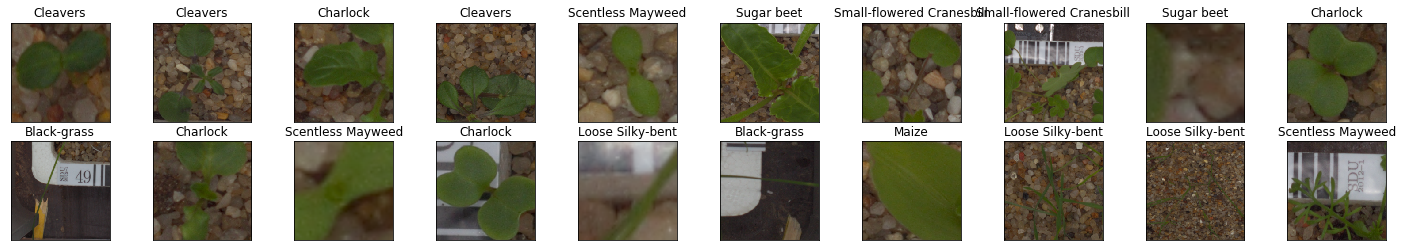

In [20]:

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # converting images to numpy for display

# ploting the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])